<a href="https://colab.research.google.com/github/cheesecakephobia/food-sales-prediction/blob/main/Food_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
filename = '//content/drive/MyDrive/PTDataScience/PandasForDataManipulation/AnyConv.com__Data.txt'
sales_prediction = pd.read_csv(filename)

In [76]:
sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [77]:
df= sales_prediction.loc[0:8523,:].dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [78]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [79]:
df.rename(columns= {'Item_Outlet_Sales': 'Outlet_Total_Item_Sales'},inplace = True)
df['Item_Fat_Content'].replace({'low fat': 'Low Fat','reg': 'Regular','LF':'Low Fat'},inplace= True)

In [80]:
type = df['Item_Type']
total_sales = df['Outlet_Total_Item_Sales']
fat_content = df['Item_Fat_Content']
outlet = df['Outlet_Type']
outlet_size = df['Outlet_Size']


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Outlet_Total_Item_Sales    4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


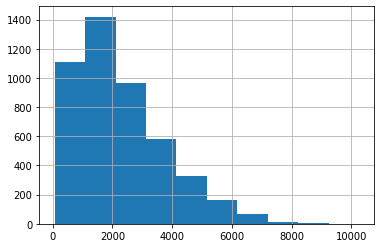

In [82]:
df['Outlet_Total_Item_Sales'].hist()

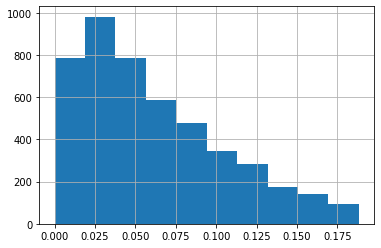

In [83]:
 df['Item_Visibility'].hist()

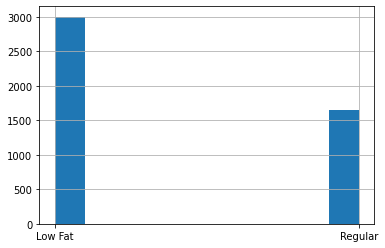

In [84]:
df['Item_Fat_Content'].hist()

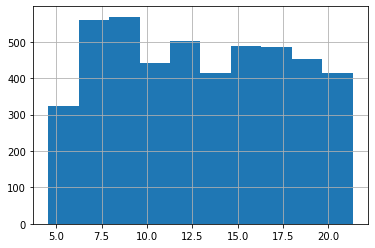

In [85]:
df['Item_Weight'].hist()

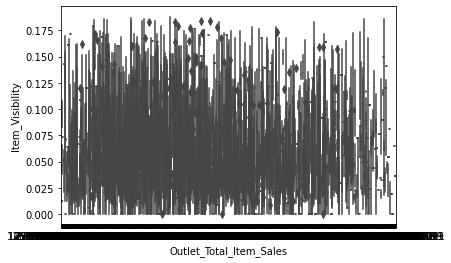

In [55]:
sns.boxplot(x= 'Outlet_Total_Item_Sales', y= 'Item_Visibility',data= df)

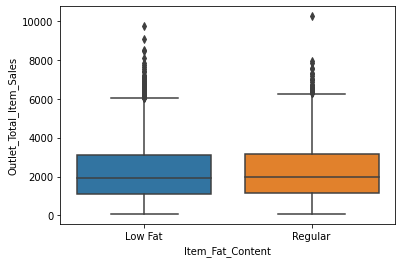

In [63]:
sns.boxplot(x= 'Item_Fat_Content', y= 'Outlet_Total_Item_Sales',data= df)

In [64]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Item_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [65]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [86]:
df['Item_Fat_Content'].replace({'Low Fat': 1,'Regular':0}, inplace = True)
df['Outlet_Size'].replace({'Medium': 1,'High':0, 'Small':0}, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Item_Sales
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,0,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,0,0.000000,Baking Goods,51.4008,OUT018,2009,1,Tier 3,Supermarket Type2,556.6088


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   int64  
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   int64  
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Outlet_Total_Item_Sales    4650 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 632.3+ KB


In [87]:
cm = df.corr()
cm

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Total_Item_Sales
Item_Weight,1.000000,0.033026,-0.010229,0.033330,-0.010596,-0.000569,0.010972
Item_Fat_Content,0.033026,1.000000,-0.059357,-0.006966,-0.001849,-0.005792,-0.008847
Item_Visibility,-0.010229,-0.059357,1.000000,-0.007292,0.009324,0.003831,-0.009644
Item_MRP,0.033330,-0.006966,-0.007292,1.000000,0.004105,-0.009527,0.679594
Outlet_Establishment_Year,-0.010596,-0.001849,0.009324,0.004105,1.000000,0.530455,-0.040869
Outlet_Size,-0.000569,-0.005792,0.003831,-0.009527,0.530455,1.000000,-0.054421
Outlet_Total_Item_Sales,0.010972,-0.008847,-0.009644,0.679594,-0.040869,-0.054421,1.000000


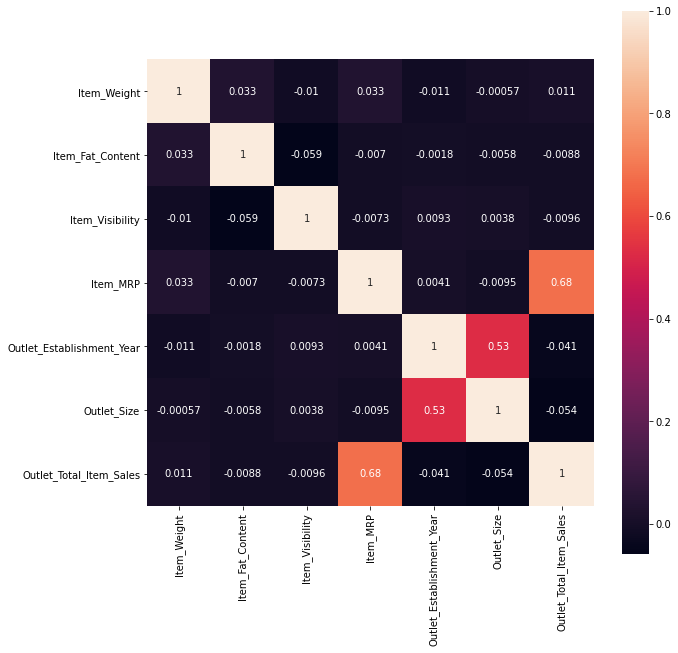

In [92]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, square= True)
plt.show()